# SCSP5013-Advanced Analytics(Alternative Assessment)

### TAN FEI ZHI B19EC0041

# Supervised Learning
#### Dataset used: Iris
#### Method used: Random Forest
#### Data source: https://www.kaggle.com/code/anshigupta01/iris-flower-classification/data

# Topic Walkthrough

Since the pre-analytics data, data exploration and visualization and feature selection have been conducted and covered in project. Hence, this study will start from supervised learning. However, data pre-processing will be conducted to clean the data before start with supervised learning.

#### Topic 1: Import Data
#### Topic 2: Data-preprocessing
#### Topic 3: Supervised Learning (Random Forest)
#### Topic 4: Optimization (Stochastic Gradient Descent)
#### Topic 5: Conclusion

# Topic 1: Import Data

Import libraries and dataset

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

#### Read Data

In [2]:
path = "C:\\Users\\User\\Downloads\\Iris Dataset.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Topic 2: Data Pre-processing

#### Import Libraries 

In [4]:
from sklearn.model_selection import train_test_split

#### Drop Unused Column(Id)

Since Id is not necessary in this study, hence the attribute is dropped before proceeding with supervised learning.

In [5]:
df1 = df.drop(['Id'], axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Encode Species (from string to integer)

This step is significant to convert/encode the species from string to integer(eg:Iris-setosa to 0).

In [6]:
df1['Species'] = pd.factorize(df1["Species"])[0] 
Target = 'Species'
df1['Species'].unique()

array([0, 1, 2], dtype=int64)

#### Define the Important Features and Assign it as Features

In [7]:
Features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

#### Split Dataset to Training and Testing/Validation Data

Before starting with supervised training, it is a compulsory step to split the dataset to training and testing data. <br>
This method aids in ensuring the accuracy of data model construction and the processes that use data models. <br>
In this study, splitting dataset into training and testing data.80% of data for training and 20% of data for validation.<br><br>
Random state ensures that the splits that you generate are reproducible.
The random_state in this study is set to **3**. It means that running 3 times of validation. <br>
Without random_state, it calls the function multiple times will produce different results.<br>
With random_state, it will produce the same results across different calls.

In [8]:
x, y = train_test_split(df1, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state=3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target Class        :  Species
Training Set Size   :  (120, 5)
Test Set Size       :  (30, 5)


# Topic 3: Supervised Learning (Random Forest)

### Random Forest

A randomly chosen portion of the training data is used by the Random forest classifier to generate a collection of decision trees. It simply consists of a collection of decision trees (DT) from a randomly chosen subset of the training set, which are subsequently used to decide the final prediction.

Random Forest provides the highest accuracy for classification. It can be used for handling a large dataset of data. It can avoid overfitting of data. However, it is more complicated compared to other classification methods.

#### Import Libraries

In [9]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#### Create RF Model

**n_estimators**:The number of trees you want to build before taking the maximum voting or averages of predictions. <br>
**min_samples_split**:The minimum number of samples required to split the internal node.<br>
**max_depth**:The longest path between the root node and the leaf node.<br>
**min_samples_leaf**:The minimum number of samples required to be a leaft node.<br>

After creating the RF model, fit the data to the created RF model and do the prediction.

In [10]:
rf_model = RandomForestClassifier(n_estimators=70, 
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

#Fit to the RF model
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

#### Model Evaluation

In this session, the performance of model will be evaluated by validation process based on accuracy, recall, precision, F1 Score and confusion matrix.<br><br>
**Accuracy**:The fraction of predictions our model got right.<br>
**Recall**: It indicates that how many of the true positives were recalled.<br>
**Precision**:The quality of a positive prediction made by the model.<br>
**F1 score**:It is a performance predictor of a model by combining two metrics — precision and recall.<br>
**Confusion Matrix**:A matrix to determine the performance of the classification models for test data.

Next, the visualization of confusion matrix using heatmap also been plotted to observe the performance of the model.

========== Random Forest Results ==========
Accuracy    :  0.9666666666666667
Recall      :  0.9666666666666667
Precision   :  0.9696969696969696
F1 Score    :  0.9666666666666667
Confusion Matrix: 
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


<AxesSubplot:>

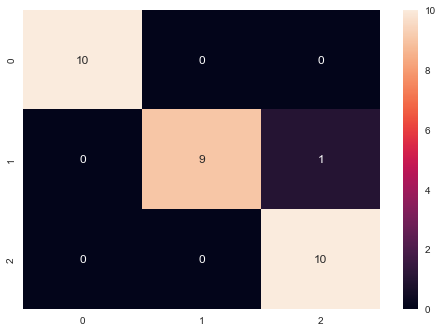

In [11]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)
sns.heatmap(confusion_m, annot=True)

Based on the results above, it shows a very good performance with 0.97 accuracy,recall,precision and F1 score.

#### Classification Report

In this section, the classification report is printed to observe the precision,recall and f1 score based on different features.

================= Classification Report =================

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



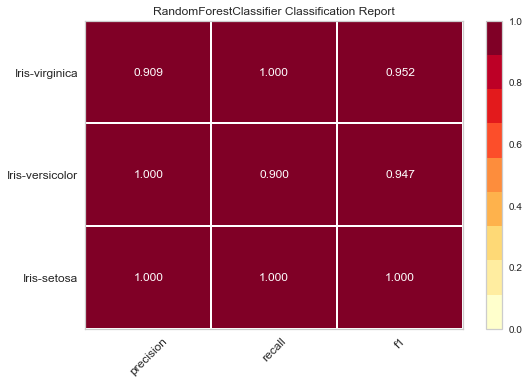

In [12]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

Based on the result above, we can observe that the precision,recall and f1 score of three types of iris species. <br>
The most accurate is the iris-sentosa with 1.0 for three metrics. 

# Topic 4: Optimization(Stochastic Gradient Descent)

Optimization is the process where we train the model iteratively that results in a maximum and minimum function evaluation. It is one of the most important phenomena in Machine Learning to get better results.In a simple word, optimization is an effective approach to achieve a "best" solution, where a single objective is maximized or minimized.

### Stochastic Gradient Descent(SGD)

The optimization algorithm stochastic gradient descent is frequently used in machine learning applications to identify the model parameters that best match the expected and actual outputs.<br><br>
Stochastic Gradient Descent is that it does the calculations faster than gradient descent and batch gradient descent.<br>
It is easier to fit in the memory due to a single training example being processed by the network.<br>
For larger datasets, it can converge faster as it causes updates to the parameters more frequently.<br>

However, unlike batch gradient descent, stochastic gradient descent does not descend smoothly because of its inherent randomness. This implies that it will oscillate, and while it might generate useful parameters, they are rarely going to be ideal.

#### Import libraries for SGD

In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

#### Assigned X,y and thetas

Assigned species as y and other variables as X

In [37]:
X,y = df.drop('Species',axis=1),df['Species']

thetas = np.zeros(X.shape[1])

#### Encoded Species 

In [38]:
df['Species'] = pd.factorize(df["Species"])[0] 
Target = 'Species'
df['Species'].unique()

array([0, 1, 2], dtype=int64)

#### Cost Function

A cost function, often known as a loss function, is a simple function that figures out how much money a hypothesis loses.

In [39]:
def cost_function(X,Y,B):
    predictions = np.dot(X,B.T)
    
    cost = (1/len(Y)) * np.sum((predictions - Y) ** 2)
    return cost

In [40]:
cost_function(X,y,thetas)

1.6666666666666667

#### Mean Squared Error

Mean Squared Error is a measure of how close a fitted line is to data points.

In [41]:
mean_squared_error(np.dot(X,thetas.T),y)

1.6666666666666667

#### Stochastic Gradient Descent(SGD) Implementation

Implementing SGD here.

#### Min-Max Scaling

Min-max scaling is to subtract the minimum value in the dataset with all the values 
and then divide this by the range of the dataset(maximum-minimum). 

In [42]:
X_norm = (X - X.min()) / (X.max() - X.min())
X = X_norm

#### Learning Schedule

Setting the learning rate can be challenging since Stochastic Gradient Descent's inherent randomness prevents the algorithm from ever settling at a minimum.

In order to give the algorithm a better chance of finding the global minimum, one way is to set the learning rate to be initially big (so it can bypass local optima) and then gradually decline.

In [43]:
t0,t1 = 5,50 # hyperparams
def learning_schedule(t):
    return t0/(t+t1)

In [48]:
def stochastic_gradient_descent(X,y,theta,n_epochs=50):
    c_hist = [0] * n_epochs
    for epoch in range(n_epochs):
        for i in range(len(y)):
            rand_index = np.random.randint(len(y))
            ind_x = X[rand_index:rand_index+1]
            ind_y = y[rand_index:rand_index+1]

            gradients = 2 * ind_x.T.dot(ind_x.dot(theta) - ind_y)
            eta = learning_schedule(epoch * len(y) + i)
            theta = theta - eta * gradients
            c_hist[epoch] = cost_function(ind_x,ind_y,theta)
    return theta,c_hist

In [49]:
th_n,cost_history = stochastic_gradient_descent(X,y,thetas)

#### Evaluating the performance of SGD

In [50]:
mean_squared_error(np.dot(X,th_n.T),y)

0.03261903876175174

Based on the result above, the performance is quite good since the mean squared error reduced from 1.67 to 0.03.<br>
We can observe the improvement after SGD optimization.

#### Plot the graph

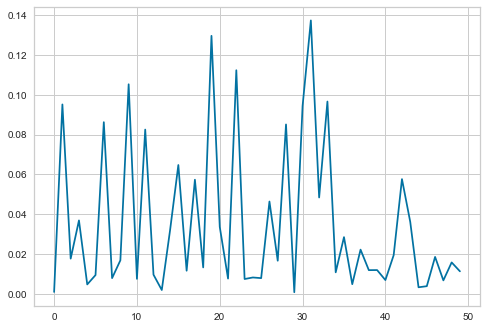

In [51]:
plt.plot(range(50),cost_history)
plt.show()

Based on the line graph above, we can see the cost function(loss) by the number of epochs.<br>
The loss is gradually decreasing from epoch to epoch.<br>
The result shown above is an ideal situation for the optimization.

# Topic 5: Conclusion

In conclusion, there are a few topics that have been covered in this study.Since the data pre-analytics have been covered in group project, this study starts with data pre-processing to drop unused column(Id) and encode the species. After data pre-processing, the iris dataset is splitted into training and testing data.<br>
80% of data is used for training and 20% of data is used for testing/validation.

Next,the supervised learning takes place. The algorithm selected for this study is Random Forest.
I have go through a few classification methods and Random Forest is one of the supervised learning methods which showing the highest accuracy.
RF consists of many decision trees. The brief explanation of RF will be included in the report and section Topic 2.
The RF model is created by defining the variables such as n_estimators and min_samples_split.<br>
By then, the data fits to the model and the prediction is conducted based on features.
The performance of RF is evaluated by accuracy, recall, precision, f1 score and confusion matrix.
The RF shows a very high accuracy with 0.97 means that the prediction is very accurate.
The created RF model fits well to the dataset.<br>

In addition, the Stochastic Gradient Descent(SGD) is selected for optimization. Stochastic gradient descent is an optimization algorithm often used in machine learning applications to find the model parameters that correspond to the best fit between predicted and actual outputs.
The cost function is used to find the loss. A cost function is an important parameter that determines how well a machine learning model performs for a given dataset.
SGD will run from epoch to epoch and lastly the performance of SGD is evaluated by mean_sqaured_error.
The performance is quite good since the mean squared error reduced from 1.67 to 0.03.
This situation indicates the improvement after SGD optimization.
Also, the line graph is plotted to visualize the loss from epoch to epoch.<br>

To sum up, RF is a good algorithm for supervised learning with a high accuracy.
The optimization using Stochastic Gradient Descent reduce the loss and improve the performance.<br>
